In [2]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt

In [21]:
data = pd.read_csv('response1.csv')
data.head()

,Response,Movies,Horror,Thriller,Comedy,Romantic,Sci-fi,War,Fantasy/Fairy tales,Animated,...,Politics,Law,Sports,RESPONSE,MOVIES,MOVIE_G,MUSIC,MUSIC_G,INTEREST,RATING
0,1,5.0,4.0,2.0,5.0,4.0,4.0,1.0,5.0,5.0,...,1.0,1.0,5.0,1,Yes,Comedy,Yes,Rock,Sports,34
1,2,5.0,2.0,2.0,4.0,3.0,4.0,1.0,3.0,5.0,...,4.0,2.0,1.0,2,Yes,Other,Yes,Rock,Other,31
2,3,5.0,3.0,4.0,4.0,2.0,4.0,2.0,5.0,5.0,...,1.0,3.0,2.0,3,Yes,Other,Yes,Rock,Other,28
3,4,5.0,4.0,4.0,3.0,3.0,4.0,3.0,1.0,2.0,...,5.0,5.0,1.0,4,Yes,Other,Yes,Other,Politics,31
4,5,5.0,4.0,4.0,5.0,2.0,3.0,3.0,4.0,4.0,...,3.0,2.0,1.0,5,Yes,Comedy,Yes,Rap,Other,37


In [22]:
data1 = data[['RESPONSE','MOVIES','MOVIE_G','MUSIC','MUSIC_G','INTEREST','RATING']]
data1.head()

,RESPONSE,MOVIES,MOVIE_G,MUSIC,MUSIC_G,INTEREST,RATING
0,1,Yes,Comedy,Yes,Rock,Sports,34
1,2,Yes,Other,Yes,Rock,Other,31
2,3,Yes,Other,Yes,Rock,Other,28
3,4,Yes,Other,Yes,Other,Politics,31
4,5,Yes,Comedy,Yes,Rap,Other,37


In [25]:
data2 = data1.copy()
features = ['MOVIES', 'MOVIE_G', 'MUSIC', 'MUSIC_G','INTEREST'] # change this for different data 
data2[features] = data2[features].astype('category') 

In [26]:
data2.dtypes

RESPONSE       int64
MOVIES      category
MOVIE_G     category
MUSIC       category
MUSIC_G     category
INTEREST    category
RATING         int64
dtype: object

In [27]:
# define y (target variable): the ratings 
y = data2['RATING'] # chance this for different data

# define x variables - binary (dummy) variables for each feature
# dummy variables: put a 1 if a feature has that category 
# (e.g. row 0 has a car with 4WD, 4 doors, 5 seats, gas engine, price $30K)
# (e.g. row 1 has a car with FWD, 2 doors, 5 seats, gas engine, price $40K)
x = pd.get_dummies(data2[features])

x

,MOVIES_Neutral,MOVIES_No,MOVIES_Yes,MOVIE_G_Action,MOVIE_G_Comedy,MOVIE_G_Horror,MOVIE_G_Other,MUSIC_Neutral,MUSIC_No,MUSIC_Yes,MUSIC_G_Other,MUSIC_G_Pop,MUSIC_G_Rap,MUSIC_G_Rock,INTEREST_Law,INTEREST_Other,INTEREST_Politics,INTEREST_Sports
0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1
1,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0
2,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0
3,0,0,1,0,0,0,1,0,0,1,1,0,0,0,0,0,1,0
4,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1005,0,0,1,0,0,0,1,0,0,1,1,0,0,0,0,1,0,0
1006,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,0,0,1
1007,0,0,1,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0
1008,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0


In [28]:
res = sm.OLS(y, x).fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 RATING   R-squared:                       0.479
Model:                            OLS   Adj. R-squared:                  0.472
Method:                 Least Squares   F-statistic:                     70.50
Date:                Tue, 25 May 2021   Prob (F-statistic):          3.43e-131
Time:                        11:23:07   Log-Likelihood:                -2732.3
No. Observations:                1010   AIC:                             5493.
Df Residuals:                     996   BIC:                             5562.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
MOVIES_Neutral        7.7550      0.388     19.988      0.000       6.994       8.516
MOVIES_No             5.8500      0.643      9.094      0.000       4.588       7.112
MOVIES_Yes           10.1707      0.281     36.257      0.000       9.620      10.721
MOVIE_G_Action        6.3049      0.409     15.399      0.000       5.501       7.108
MOVIE_G_Comedy        5.7821      0.200     28.866      0.000       5.389       6.175
MOVIE_G_Horror        8.2637      0.271     30.502      0.000       7.732       8.795
MOVIE_G_Other         3.4250      0.227     15.068      0.000       2.979       3.871
MUSIC_Neutral         8.2710      0.501     16.494      0.000       7.287       9.255
MUSIC_No              6.8951      0.596     11.575      0.000       5.726       8.064
MUSIC_Yes             8.6097      0.292     29.522      0.000       8.037       9.182
MUSIC_G_Other         4.0882      0.190     21.528      0.000       3.716       4.461
MUSIC_G_Pop           5.7617      0.300     19.198      0.000       5.173       6.351
MUSIC_G_Rap           8.1919      0.261     31.434      0.000       7.681       8.703
MUSIC_G_Rock          5.7339      0.212     27.065      0.000       5.318       6.150
INTEREST_Law          7.5623      0.476     15.901      0.000       6.629       8.496
INTEREST_Other        2.6382      0.204     12.927      0.000       2.238       3.039
INTEREST_Politics     7.9237      0.323     24.542      0.000       7.290       8.557
INTEREST_Sports       5.6515      0.244     23.138      0.000       5.172       6.131
==============================================================================
Omnibus:                        6.115   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.047   Jarque-Bera (JB):                5.776
Skew:                          -0.144   Prob(JB):                       0.0557
Kurtosis:                       2.766   Cond. No.                     1.60e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.14e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [29]:
# extract the partworths (coefficients) from results
# take 3 columns only
partworths = pd.DataFrame({'feature': res.params.keys(), 'partworth': res.params.values,  'p-value': res.pvalues})

# sorty by partworth values
partworths = partworths.sort_values(by='partworth', ascending = False)

partworths

,feature,partworth,p-value
MOVIES_Yes,MOVIES_Yes,10.170674,3.378165e-184
MUSIC_Yes,MUSIC_Yes,8.609682,4.066261e-138
MUSIC_Neutral,MUSIC_Neutral,8.270994,3.225487e-54
MOVIE_G_Horror,MOVIE_G_Horror,8.263738,7.807969e-145
MUSIC_G_Rap,MUSIC_G_Rap,8.191949,3.187279e-151
INTEREST_Politics,INTEREST_Politics,7.923731,2.116299e-104
MOVIES_Neutral,MOVIES_Neutral,7.755034,5.364278e-75
INTEREST_Law,INTEREST_Law,7.562328,6.607818e-51
MUSIC_No,MUSIC_No,6.895069,3.686092e-29
MOVIE_G_Action,MOVIE_G_Action,6.304894,3.699085e-48


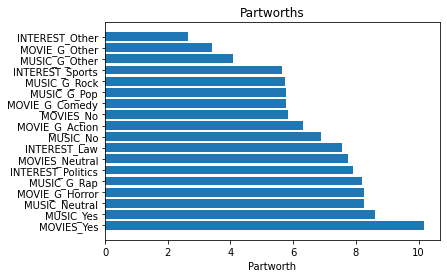

In [30]:
# plot the partworth of each feature ranked using matplotlib
xbar = np.arange(len(partworths))
plt.barh(xbar, partworths['partworth'])
plt.title('Partworths')
plt.xlabel('Partworth')
plt.yticks(xbar, labels = partworths['feature'])
plt.show()

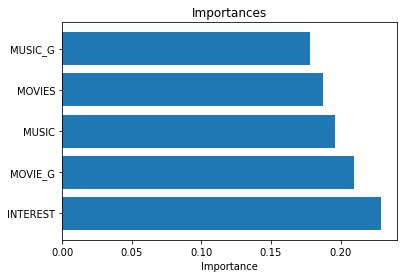

In [31]:
# calculate and plot the importance max(x) - min(x) of each feature
importance = []

for i in features: 
    values = partworths.loc[[j for j in x.columns if j.startswith(i)], 'partworth']
    importance.append(values.max() - values.min())

importance = [i/sum(importance) for i in importance]
  
importances = pd.DataFrame([features, importance]).T
importances = importances.sort_values(by=1, ascending=False)
importances.columns = ['feature', 'importance']

# plot the importance of each feature 
xbar = np.arange(len(features))
plt.barh(xbar, importances['importance'])
plt.title('Importances')
plt.xlabel('Importance')
plt.yticks(xbar, labels = importances['feature'])
plt.show()

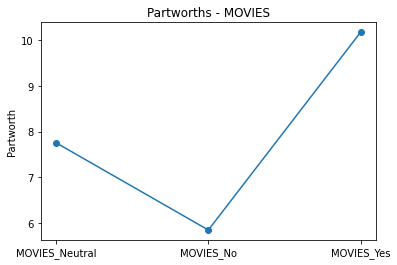

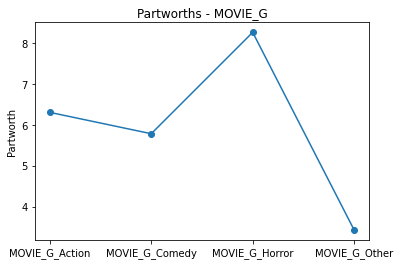

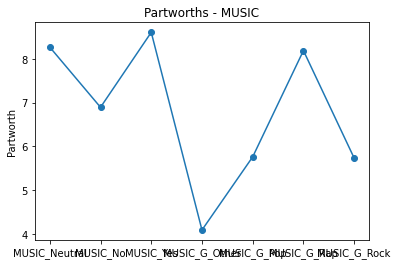

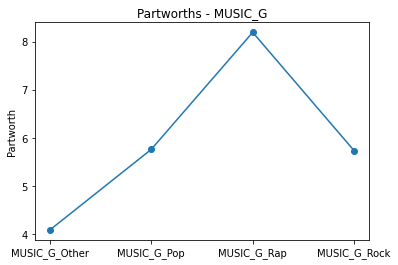

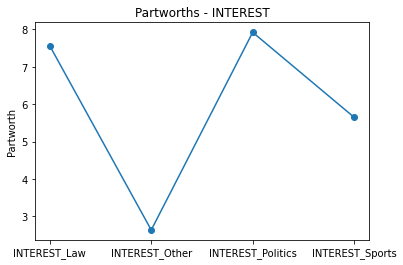

In [32]:
for i in features: 
    feature_names = [j for j in x.columns if j.startswith(i)]
    feature_values = list(partworths.loc[[j for j in x.columns if j.startswith(i)], 'partworth'])
    
    # plot the partworths by categories in each feature 
    plt.plot(feature_names, feature_values, '-o')
    plt.title('Partworths - {}'.format(i))
    plt.ylabel('Partworth')
    plt.show()

In [ ]:
# Calculate total utility of a product profile 
# Choose product features. Must use the same spelling as in the regression results
product = ['gear_fwd', 'doors_2', 'seats_8', 'engine_gas', 'price_50000']

# calculate total utility
partworths.loc[product, 'partworth'].sum()

In [ ]:
######################
######################

In [ ]:
# Time Series Forecasting

In [48]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.tsa.stattools import acf, pacf
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
data = pd.read_csv('MovieSales.CSV')
data.head()

,Year,Sales
0,1995,5314381090
1,1996,5769058904
2,1997,6358155799
3,1998,6771549637
4,1999,7338849852


In [8]:
data1 = data.dropna()
data1.head()

,Year,Sales
0,1995,5314381090
1,1996,5769058904
2,1997,6358155799
3,1998,6771549637
4,1999,7338849852


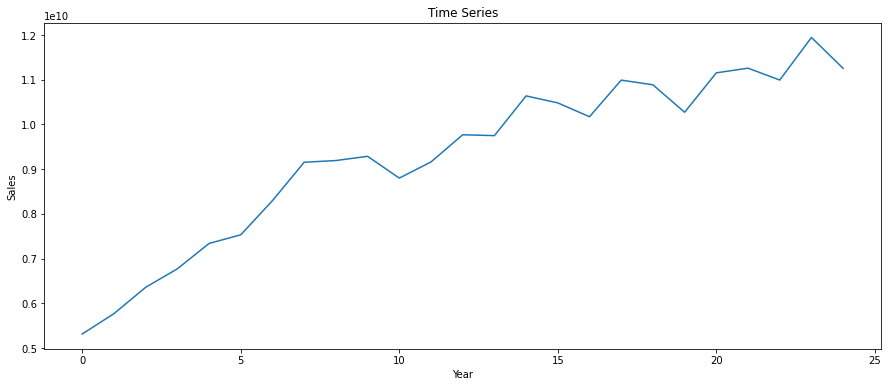

In [9]:
plt.figure(figsize=(15,6))
plt.plot(data.Sales)

plt.title('Time Series')
plt.xlabel('Year')
plt.ylabel('Sales')
plt.show()

In [ ]:
#################
### ISSUE IS HERE ###

In [1]:
data11 = pd.read_csv('MovieSales.csv')
data11.head()

NameError: name 'pd' is not defined

In [101]:
data11.dtypes

Year     int64
Sales    int64
dtype: object

In [103]:
data12 = data11.astype(int)
data12.dtypes

Year     int32
Sales    int32
dtype: object

TypeError: 'value' must be an instance of str or bytes, not a float

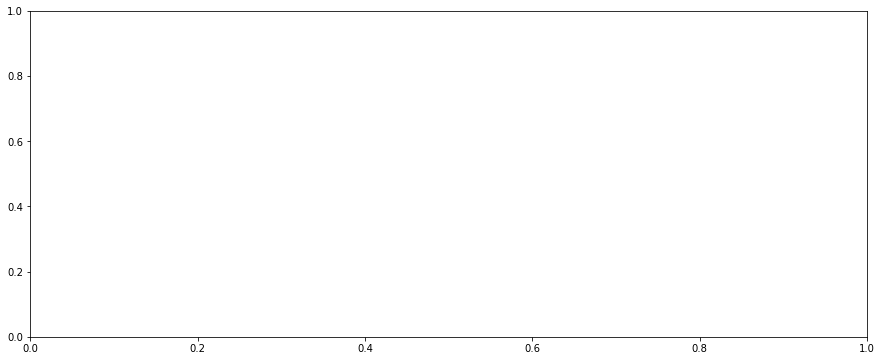

In [104]:
plt.figure(figsize=(15,6))
plt.plot(data.Sales)

plt.title('Time Series')
plt.xlabel('Year')
plt.ylabel('Sales')
plt.show()